# Exercise 1

We first load a dataset and examine its dimensions.

In [59]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [60]:
import math
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["figure.dpi"] = 300
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.tight_layout()

<Figure size 720x360 with 0 Axes>

In [61]:
xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

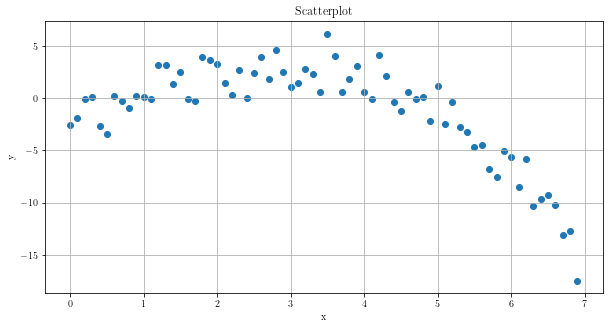

In [62]:
# Your code for scatterplot here
plt.scatter(xy_data[:,0], xy_data[:,1])
# title and axis labels
plt.title('Scatterplot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [63]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    N = data_matrix.shape[0]
    if k >= N:
        k = N-1
    x,y = data_matrix[:,0], data_matrix[:,1]
    X = np.column_stack((x**i for i in range(k+1)))
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    #beta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
    res = y - np.dot(X, beta)
    fit = np.dot(X, beta)

    return beta, fit, res
    

Use the tests below to check the outputs of the function you have written:

In [64]:
# Some tests to make sure your  function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals
#print(polyreg(test_matrix, k=0))

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

C:\Users\louis\AppData\Local\Temp\ipykernel_19872\2318626415.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.column_stack((x**i for i in range(k+1)))


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

C:\Users\louis\AppData\Local\Temp\ipykernel_19872\2318626415.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.column_stack((x**i for i in range(k+1)))


k=2:  13.122
k=3:  12.345
k=4:  12.297


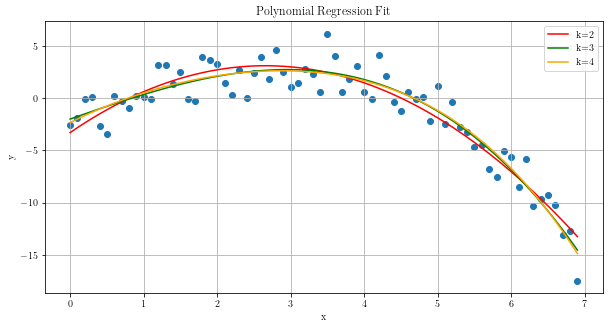

In [65]:
#Your code here

_, fit_1, res_1 = polyreg(xy_data, k=2)
_, fit_2, res_2 = polyreg(xy_data, k=3)
_, fit_3, res_3 = polyreg(xy_data, k=4)

print('k=2: ', np.round(np.linalg.norm(res_1), 3))
print('k=3: ', np.round(np.linalg.norm(res_2), 3))
print('k=4: ', np.round(np.linalg.norm(res_3), 3))

plt.scatter(xy_data[:,0], xy_data[:,1])
plt.plot(xy_data[:,0], fit_1, color='red', label='k=2')
plt.plot(xy_data[:,0], fit_2, color='green', label='k=3')
plt.plot(xy_data[:,0], fit_3, color='orange', label='k=4')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.grid()
plt.legend()
plt.show()

 #### State which model you choose and briefly justify your choice.
 
 
 $ k = 3 $ provides a very similar fit to $ k = 4 $ and so for large datasets or a large number of data sets this would be slightly faster
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

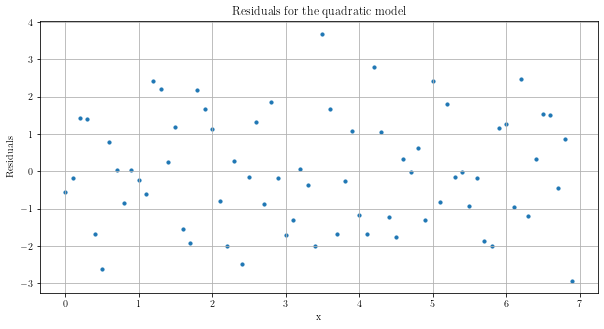

Mean of residuals for quadratic model =  -0.0 Variance of residuals =  2.177


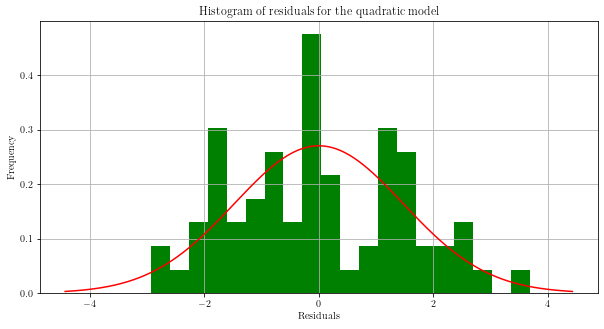

In [66]:
#Your code here
from scipy.stats import norm

x = xy_data[:,0]

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(x, res_2, s=10)
plt.title('Residuals for the quadratic model')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.grid()
plt.show()

print('Mean of residuals for quadratic model = ', np.round(np.mean(res_2), 3), 
      'Variance of residuals = ', np.round(np.var(res_2),3)) 

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(res_2, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_2_stdev = np.std(res_2)  #standard deviation of residuals
xvals = np.linspace(-3*res_2_stdev,3*res_2_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_2_stdev), 'r')
plt.title('Histogram of residuals for the quadratic model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()
